In [1]:
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier,
    GradientBoostingRegressor, ExtraTreesClassifier, AdaBoostClassifier,
    AdaBoostRegressor,
)
from sklearn.linear_model import (
    LinearRegression, LogisticRegression,
    SGDClassifier, SGDRegressor,Ridge,
    RidgeClassifier, Lasso, ElasticNet,
    PassiveAggressiveRegressor,
)
from sklearn.naive_bayes import (
    GaussianNB, MultinomialNB, BernoulliNB,
    CategoricalNB, ComplementNB,
)

from sklearn.preprocessing import (
    StandardScaler, PolynomialFeatures,
    LabelEncoder, OneHotEncoder,
)
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    r2_score, mean_squared_error, mean_absolute_error,
    roc_curve, roc_auc_score, precision_recall_curve,
    auc,
)

from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    KFold, StratifiedKFold, LeaveOneOut, LeavePOut, validation_curve,
    GridSearchCV, RandomizedSearchCV,
)
from sklearn.datasets import (
    fetch_openml, make_classification, make_regression,
)

from mlxtend.plotting import plot_decision_regions
from yellowbrick.classifier import DiscriminationThreshold, ROCAUC
from yellowbrick.model_selection import LearningCurve

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.float_format', lambda x: f'{x:.4f}')

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# <p align='center' style='color: #6c89c6;'>Работу выполнил: Таратин Артём ПМ22-1</p>

## Методичка

In [3]:
training_set = pd.read_csv(r'https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.5%20EDA/data/titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


Результат работы функции - предпросмотр загруженных данных. Рассмотрим внимательнее, что содержится в данном датасете. Ниже представлена краткая информация о каждом из столбцов датасета:

PassengerId: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как идентификатор строки и, что логично, идентификатор пассажира (т.к. для каждого пассажира в датасете представлена только одна строка).

Survived: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.

Pclass: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.

Name: Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.

Sex: Пол пассажира. Либо мужчины (=Male) либо женщины (=Female).

Age: Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записан в датасет.

SibSp: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.

Parch: Количество родителей детей (Number of parents of children travelling with each passenger).

Ticket: Номер билета.

Fare: Сумма, которую заплатил пассажир за путешествие.

Cabin: Номер каюты пассажира. "NaN" значения в этой колонке указывает на то, что номер каюты данного пассажира не был записан.

Embarked: Порт отправления данного пассажира.

In [4]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [5]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

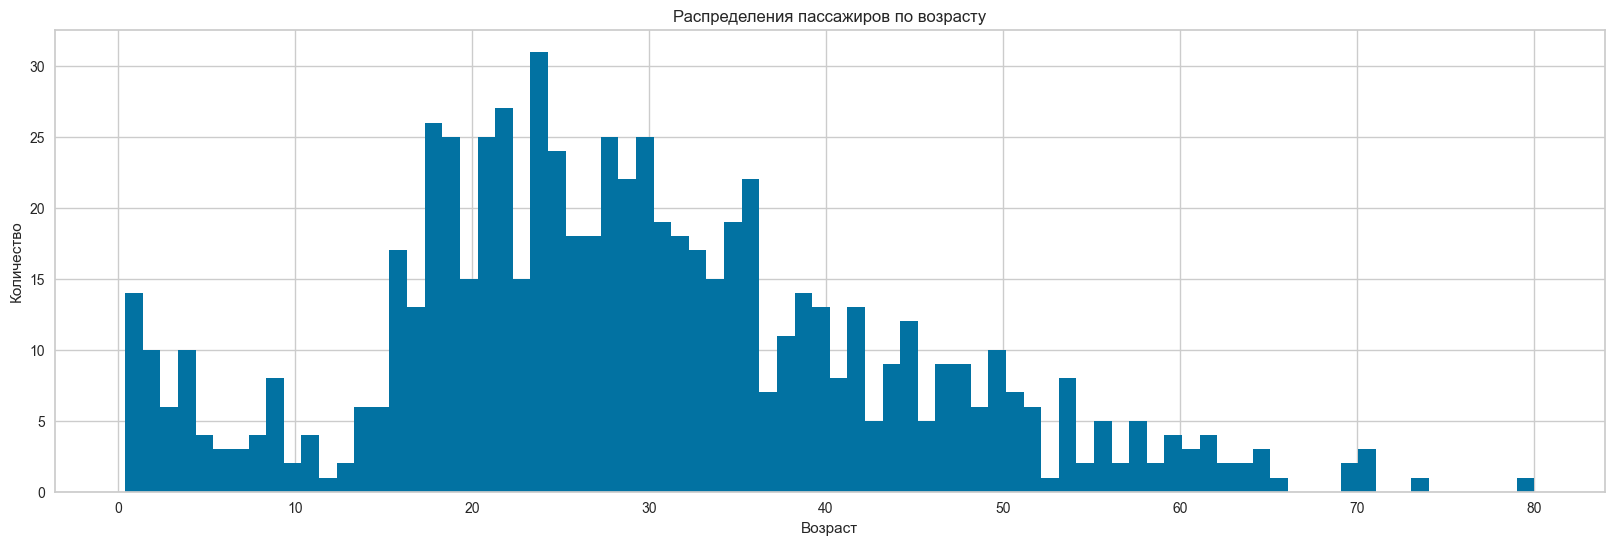

In [7]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

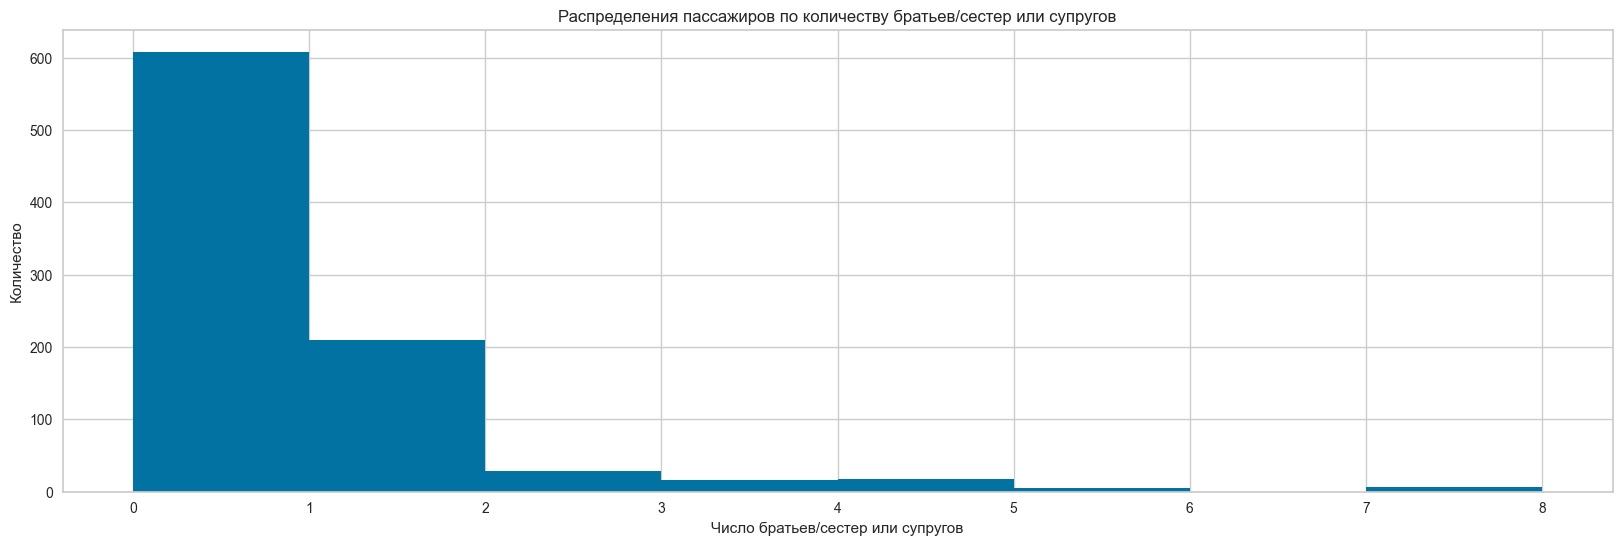

In [8]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 'Число братьев/сестер или супругов')

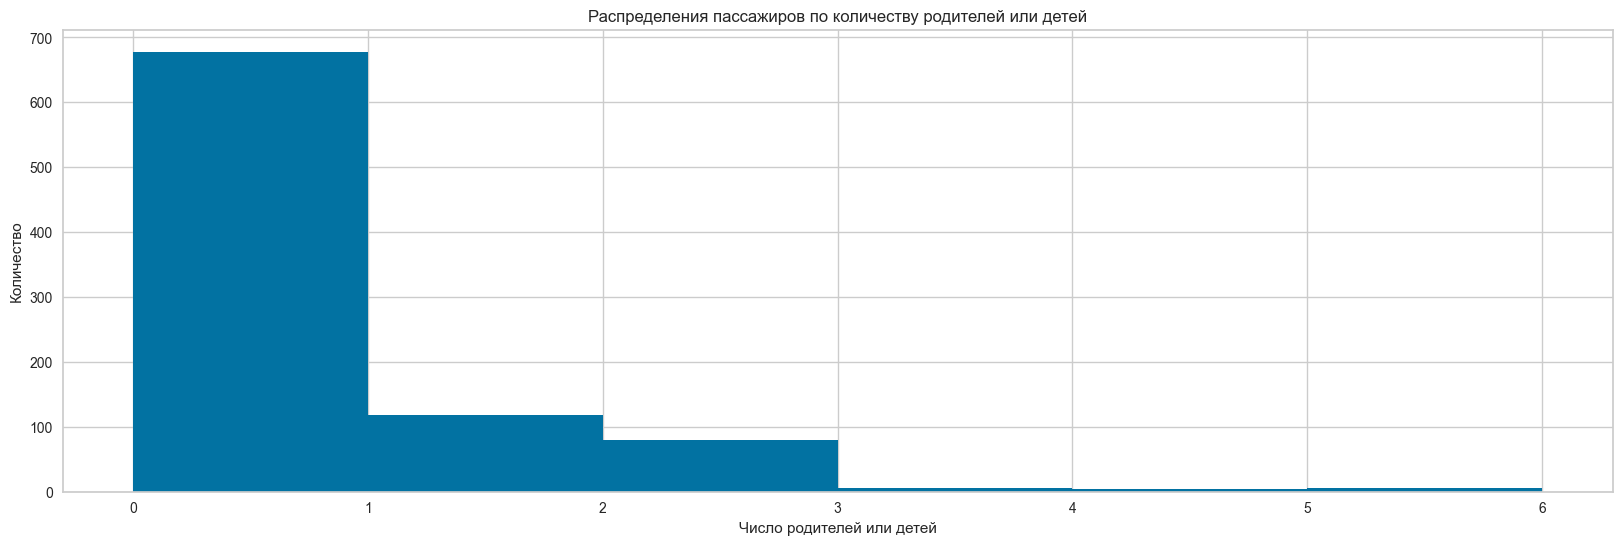

In [9]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 'Число родителей или детей')

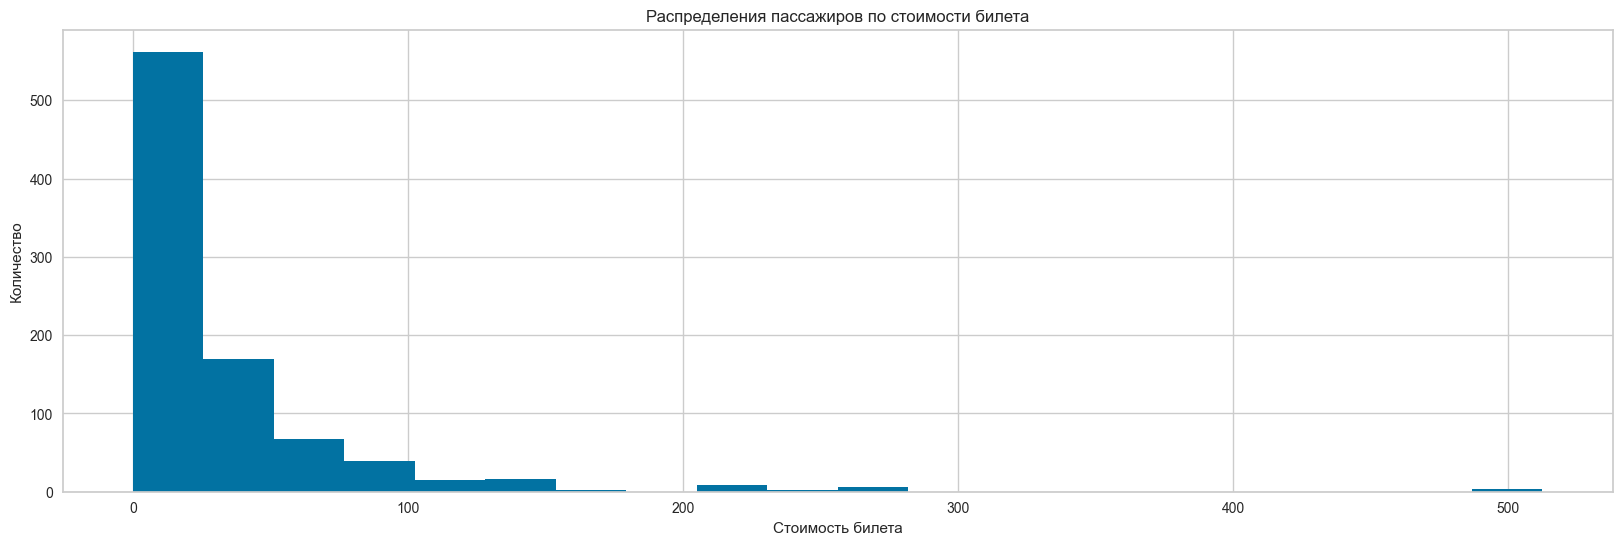

In [10]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета', 'Стоимость билета', bins=20)

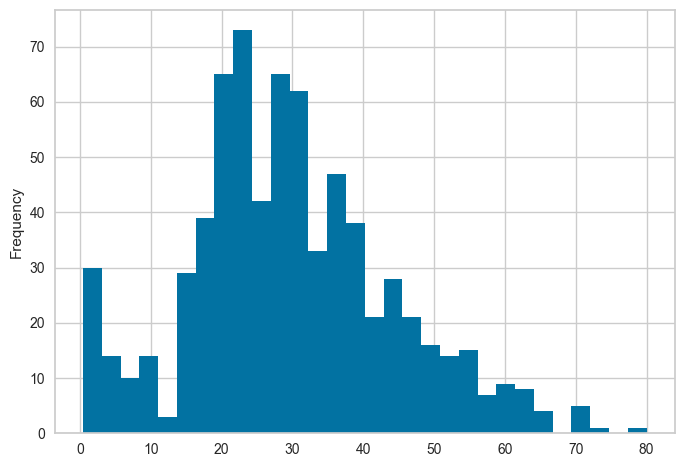

In [11]:
training_set['Age'].plot.hist(bins=30)
plt.show()

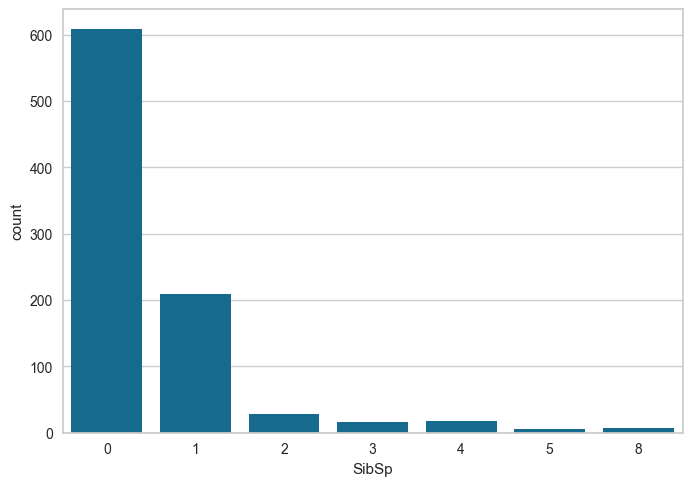

In [12]:
sns.countplot(x='SibSp', data=training_set)
plt.show()

In [13]:
training_set['Fare']

0      7.2500
1     71.2833
2      7.9250
3     53.1000
4      8.0500
        ...  
886   13.0000
887   30.0000
888   23.4500
889   30.0000
890    7.7500
Name: Fare, Length: 891, dtype: float64

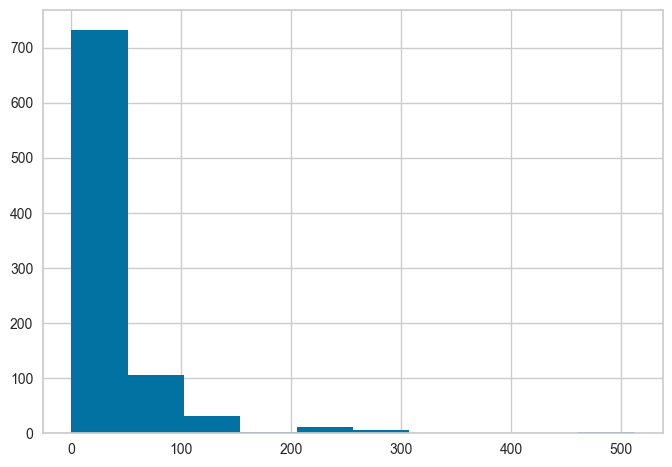

In [14]:
training_set['Fare'].hist()
plt.show()

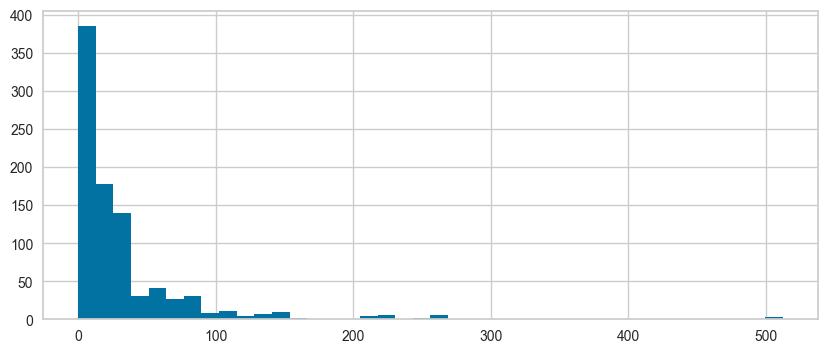

In [15]:
training_set['Fare'].hist(bins=40, figsize=(10, 4))
plt.show()

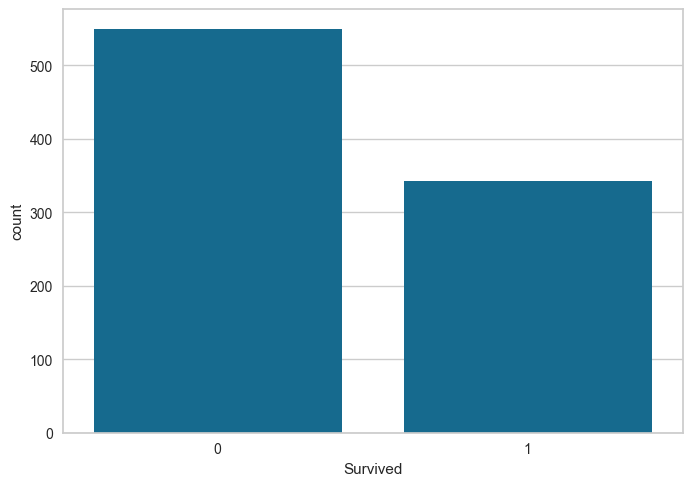

In [16]:
sns.countplot(x='Survived', data=training_set)
plt.show()

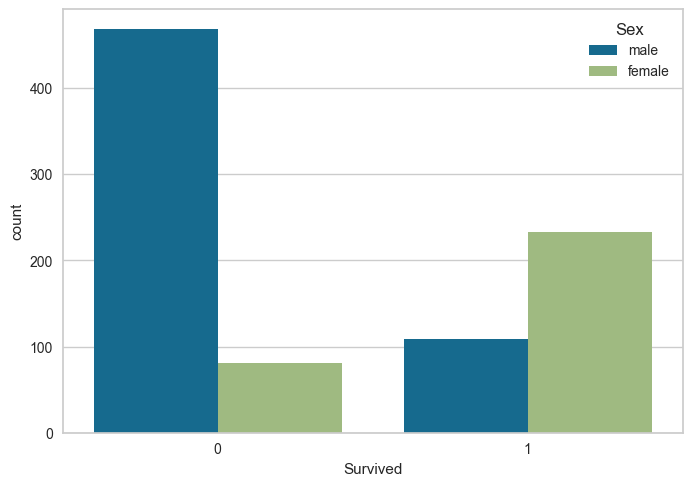

In [17]:
sns.countplot(x='Survived', data=training_set, hue='Sex')
plt.show()

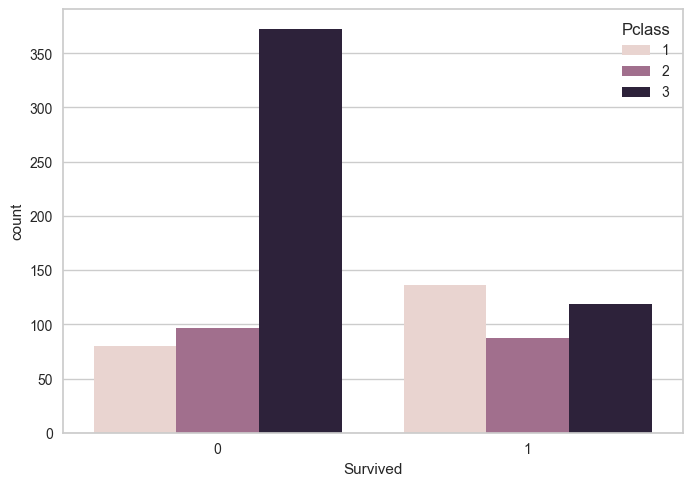

In [18]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')
plt.show()

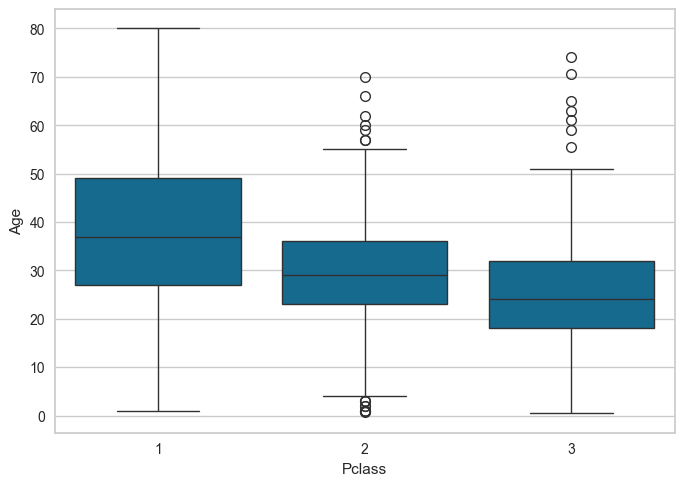

In [19]:
sns.boxplot(x='Pclass', y='Age', data=training_set)
plt.show()

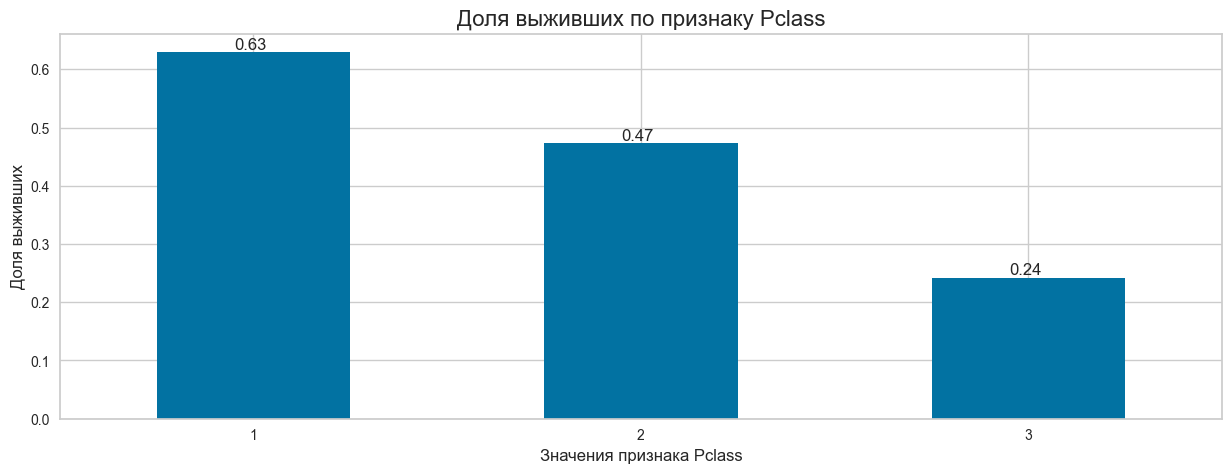

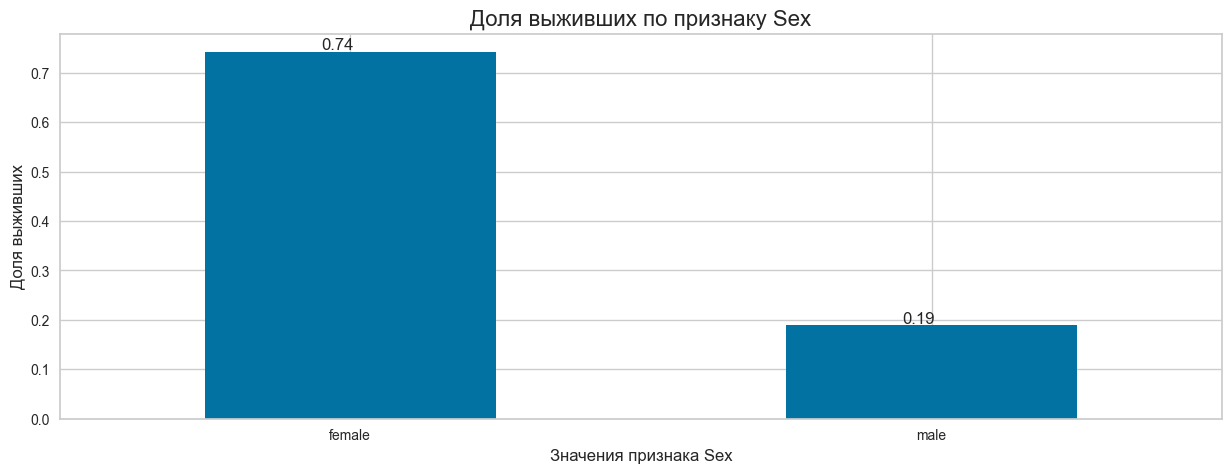

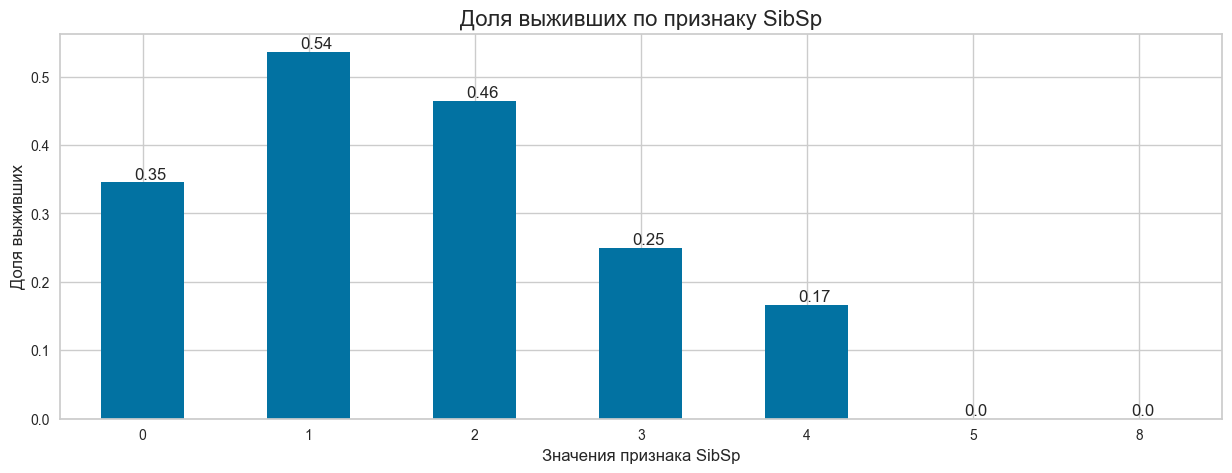

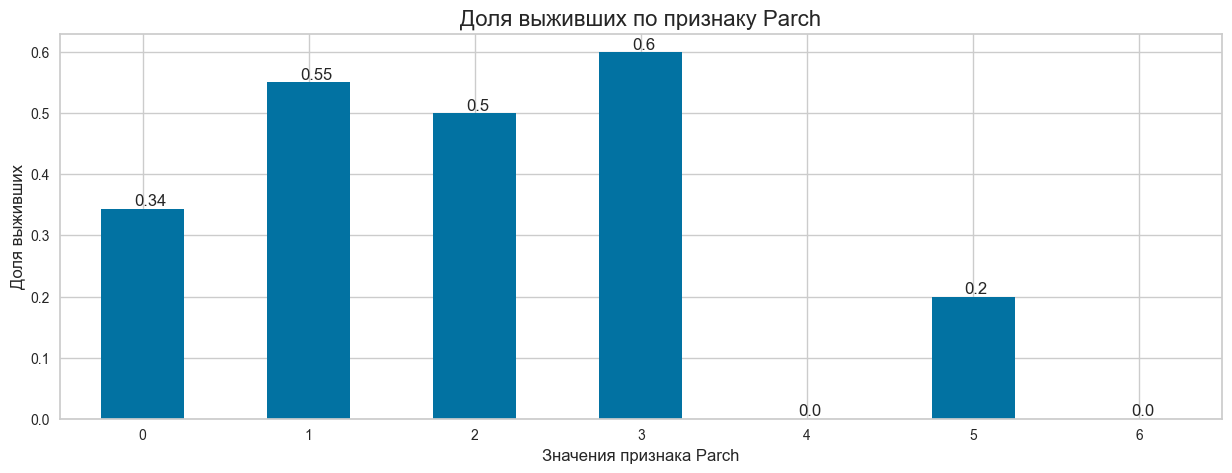

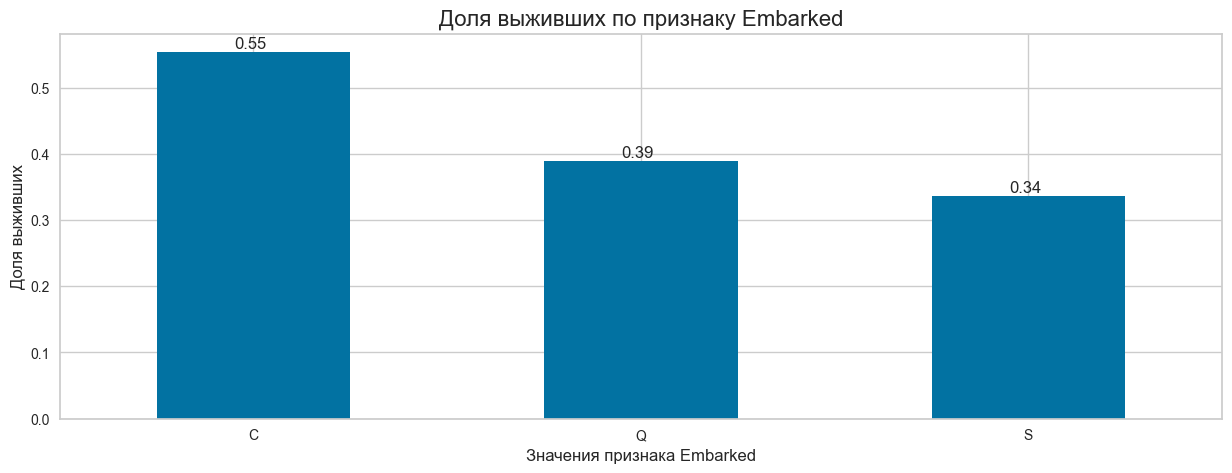

In [20]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})
    
    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))
        
    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

In [21]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


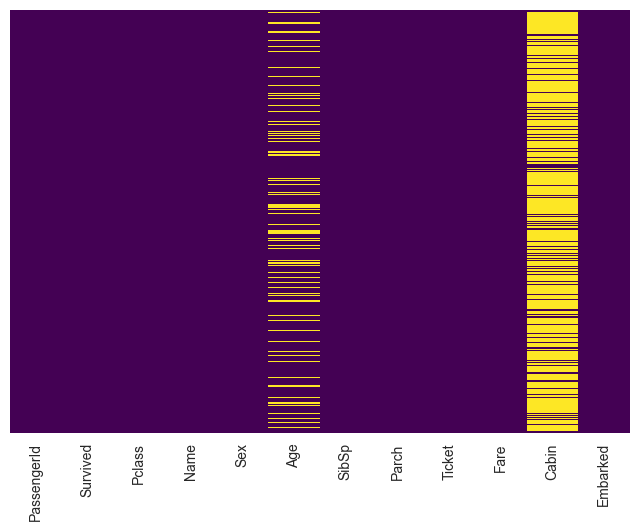

In [24]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [25]:
training_set.drop('Cabin', axis=1, inplace=True)

In [26]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,S


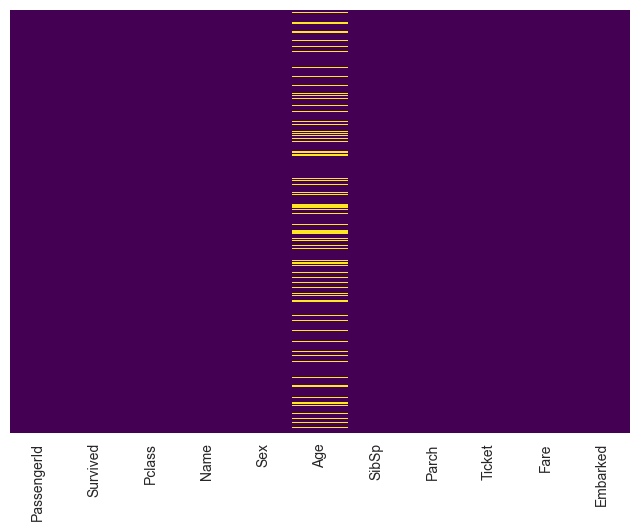

In [27]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [28]:
training_set.dropna(inplace=True)

In [29]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])

In [30]:
training_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [31]:
np.unique(cat_enc_le)

array([0, 1])

In [32]:
le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [33]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])
# Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy

In [34]:
training_set.shape

(712, 11)

In [35]:
cat_enc_ohe.shape

(712, 3)

In [36]:
pd.get_dummies(training_set['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [37]:
pd.get_dummies(training_set['Sex'], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [38]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [39]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [40]:
training_set = pd.concat([training_set, sex, embark], axis=1)
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,S,True,False,True


In [41]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0000,1,0,7.2500,True,False,True
1,1,1,38.0000,1,0,71.2833,False,False,False
2,1,3,26.0000,0,0,7.9250,False,False,True
3,1,1,35.0000,1,0,53.1000,False,False,True
4,0,3,35.0000,0,0,8.0500,True,False,True


## Задания для самостоятельного выполнения

#### 1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

In [42]:
X = training_set.drop(columns=['Survived']).to_numpy()
y = training_set[['Survived']].to_numpy().ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [44]:
ac, f1 = accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f'{ac=:.4f}\n{f1=:.4f}')

ac=0.7972
f1=0.7387


#### 2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:

In [45]:
training_set = pd.read_csv(r'https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.5%20EDA/data/titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


#### 3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [46]:
training_set['Survived'].sum() / training_set.shape[0]

0.3838383838383838

In [47]:
tb = training_set.pivot_table(index='Sex', values='Survived', aggfunc='mean')
tb

,Survived
Sex,
female,0.7420
male,0.1889


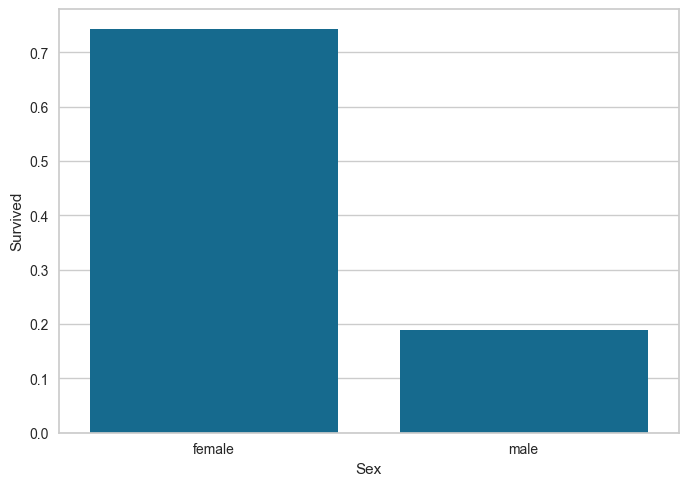

In [48]:
sns.barplot(x=tb.index, y=tb['Survived'])
plt.show()

#### 4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [49]:
tb = training_set.pivot_table(index='Pclass', values='PassengerId', aggfunc='count')
tb

,PassengerId
Pclass,
1,216
2,184
3,491


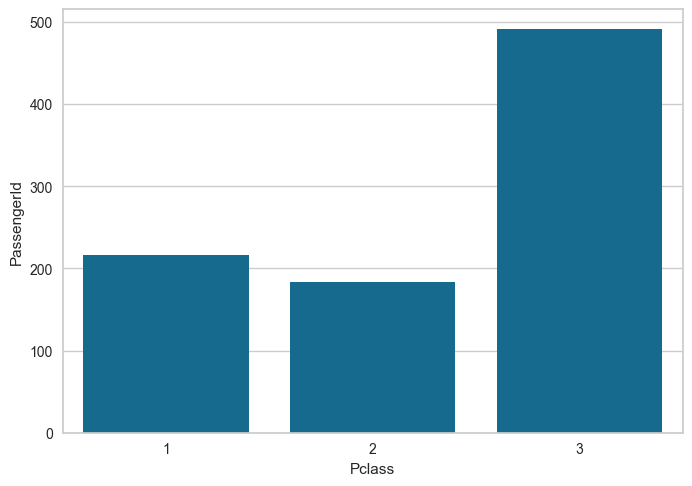

In [50]:
sns.barplot(x=tb.index, y=tb['PassengerId'])
plt.show()

In [51]:
tb = training_set[training_set['Pclass'] == 3].pivot_table(index='Sex', values='PassengerId', aggfunc='count')
tb

,PassengerId
Sex,
female,144
male,347


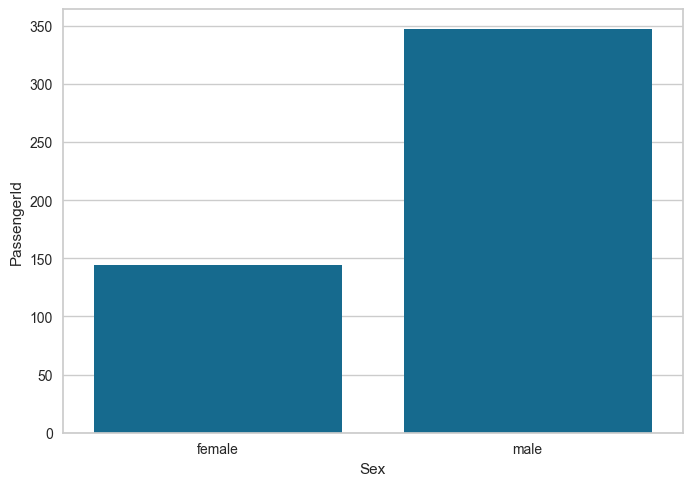

In [52]:
sns.barplot(x=tb.index, y=tb['PassengerId'])
plt.show()

#### 5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [53]:
training_set = training_set.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
training_set.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0000,1,0,7.2500,S
1,1,1,female,38.0000,1,0,71.2833,C
2,1,3,female,26.0000,0,0,7.9250,S


#### 6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

In [54]:
training_set[['Age', 'Fare']].corr()

,Age,Fare
Age,1.0000,0.0961
Fare,0.0961,1.0000


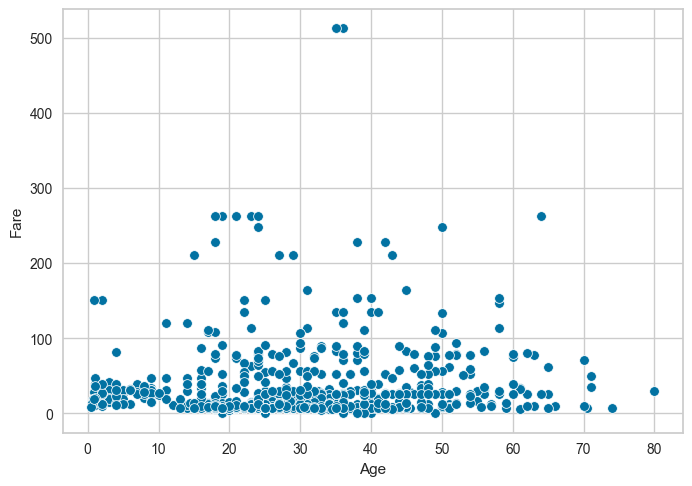

In [55]:
sns.scatterplot(data=training_set, x='Age', y='Fare')
plt.show()

#### 7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [56]:
md = np.median(np.unique(training_set['Fare']))
md

21.0375

In [57]:
training_set[training_set['Fare'] <= md]['Survived'].mean()

0.2811320754716981

In [58]:
training_set[training_set['Fare'] > md]['Survived'].mean()

0.5346260387811634

In [59]:
training_set.pivot_table(index='Pclass', values='Survived', aggfunc='mean')

,Survived
Pclass,
1,0.6296
2,0.4728
3,0.2424


#### 8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [60]:
training_set.pivot_table(index='Embarked', values='Fare', aggfunc='median')

,Fare
Embarked,
C,29.7000
Q,7.7500
S,13.0000


In [61]:
training_set['Fare'].min(), training_set['Fare'].mean(), training_set['Fare'].max()

(0.0, 32.204207968574636, 512.3292)

In [62]:
tb = training_set[training_set['Embarked'] == 'C']['Fare']
tb.min(), tb.mean(), tb.max()

(4.0125, 59.95414404761905, 512.3292)

#### 9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

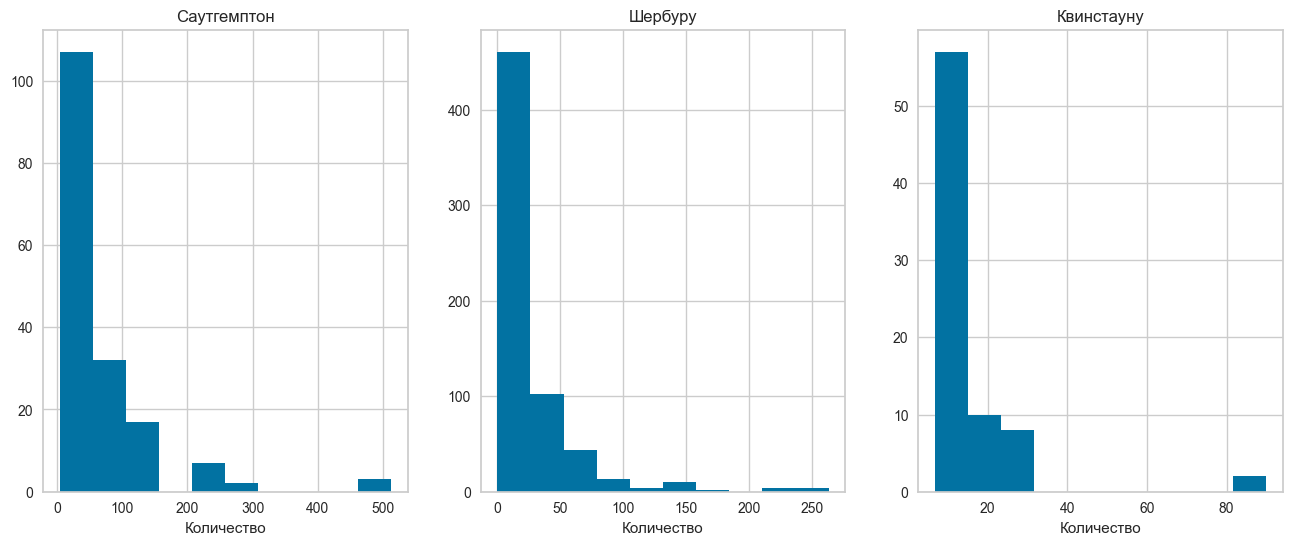

In [63]:
dst = {'C': 'Саутгемптон', 'S': 'Шербуру', 'Q': 'Квинстауну'}
fig, ax = plt.subplots(ncols=len(dst), figsize=(16, 6))
for i in range(len(dst)):
    ax[i].set_title(list(dst.values())[i])
    ax[i].hist(training_set[training_set['Embarked'] == list(dst.keys())[i]]['Fare'])
    ax[i].set_xlabel('Стоимость')
    ax[i].set_xlabel('Количество')
plt.show()

#### 10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

In [64]:
training_set.shape[0]

891

In [65]:
training_set['Survived'].sum()

342

In [66]:
891 / 1316

0.6770516717325228

#### 11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

In [67]:
training_set = training_set.dropna()
sex = pd.get_dummies(training_set['Sex'], drop_first=True)
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)
training_set = pd.concat([training_set, sex, embark], axis=1)
training_set = training_set.drop(['Sex', 'Embarked'], axis=1)

In [68]:
X, y = training_set.drop(columns=['Survived']), training_set['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

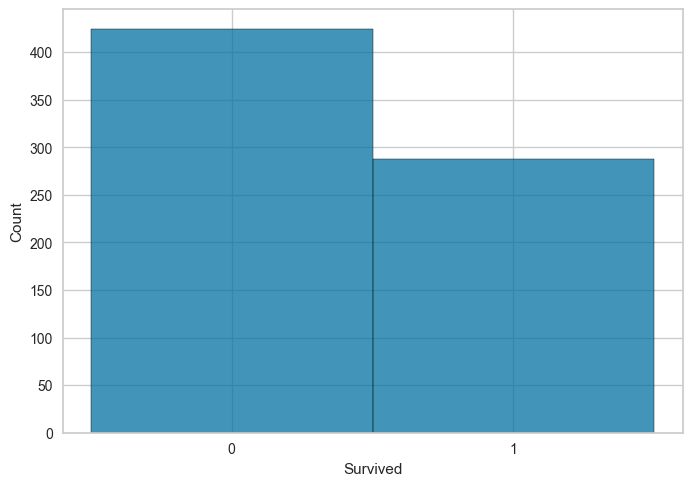

In [69]:
sns.histplot(y.astype(str))
plt.show()

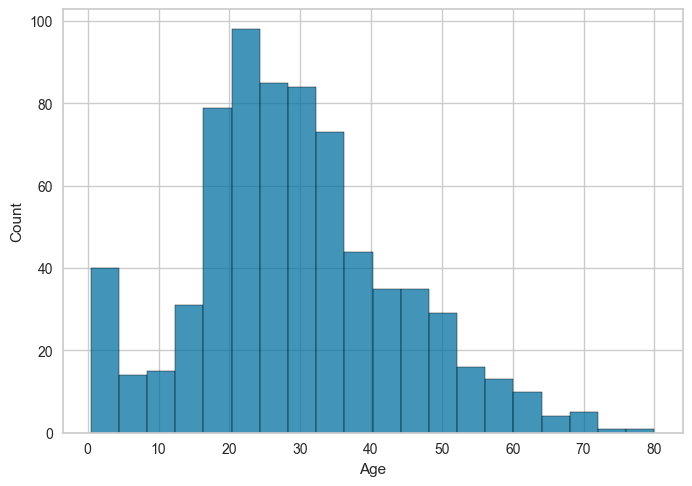

In [70]:
sns.histplot(X['Age'])
plt.show()

#### 12. Сбалансируйте классы в исходном датасете двумя способами:

In [71]:
X_over, y_over = resample(X[y == 1], y[y == 1], n_samples=X[y == 0].shape[0], random_state=42)
X_balanced_over = np.concatenate((X[y == 0], X_over))
y_balanced_over = np.concatenate((y[y == 0], y_over))
(y_balanced_over == 0).sum() == (y_balanced_over == 1).sum(), (y_balanced_over == 0).sum()

(True, 424)

In [72]:
X_under, y_under = resample(X[y == 0], y[y == 0],n_samples=X[y == 1].shape[0], random_state=42)
X_balanced_under = np.concatenate((X[y == 1], X_under))
y_balanced_under = np.concatenate((y[y == 1], y_under))
(y_balanced_under == 0).sum() == (y_balanced_under == 1).sum(), (y_balanced_under == 0).sum()

(True, 288)

#### 13. Удалите лишние объекты мажоритарного класса (выбранные случайно)

In [73]:
X_under, y_under = resample(X[y == 0], y[y == 0],n_samples=X[y == 1].shape[0], random_state=42)
X_balanced_under = np.concatenate((X[y == 1], X_under))
y_balanced_under = np.concatenate((y[y == 1], y_under))
(y_balanced_under == 0).sum() == (y_balanced_under == 1).sum(), (y_balanced_under == 0).sum()

(True, 288)

#### 14. Добавьте в выборку дубликаты миноритарного класса.

In [74]:
X_over, y_over = resample(X[y == 1], y[y == 1], n_samples=X[y == 0].shape[0], random_state=42)
X_balanced_over = np.concatenate((X[y == 0], X_over))
y_balanced_over = np.concatenate((y[y == 0], y_over))
(y_balanced_over == 0).sum() == (y_balanced_over == 1).sum(), (y_balanced_over == 0).sum()

(True, 424)

#### 15. Проведите исследование эффективности простой модели классификации до и после данных преобразований.

In [75]:
X = training_set.drop(columns=['Survived']).to_numpy()
y = training_set[['Survived']].to_numpy().ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
ac, f1 = accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f'{ac=:.4f}\n{f1=:.4f}')

ac=0.7972
f1=0.7387


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced_over, y_balanced_over, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
ac, f1 = accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f'{ac=:.4f}\n{f1=:.4f}')

ac=0.7882
f1=0.7778


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced_under, y_balanced_under, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
ac, f1 = accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f'{ac=:.4f}\n{f1=:.4f}')

ac=0.7500
f1=0.7680


#### 16. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

In [78]:
df_corr_over = pd.DataFrame(X_balanced_over, columns=training_set.columns.drop('Survived'))
df_corr_over.corr()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Pclass,1.0000,-0.3630,0.0117,0.0057,-0.5588,0.1815,0.1314,0.1930
Age,-0.3630,1.0000,-0.2695,-0.1916,0.0933,0.1119,-0.0233,0.0154
SibSp,0.0117,-0.2695,1.0000,0.3566,0.1517,-0.1226,0.0300,0.0146
Parch,0.0057,-0.1916,0.3566,1.0000,0.2042,-0.2661,-0.0273,0.0241
Fare,-0.5588,0.0933,0.1517,0.2042,1.0000,-0.1583,-0.0686,-0.2401
male,0.1815,0.1119,-0.1226,-0.2661,-0.1583,1.0000,-0.0084,0.1626
Q,0.1314,-0.0233,0.0300,-0.0273,-0.0686,-0.0084,1.0000,-0.3464
S,0.1930,0.0154,0.0146,0.0241,-0.2401,0.1626,-0.3464,1.0000


In [79]:
df_corr_under = pd.DataFrame(X_balanced_under, columns=training_set.columns.drop('Survived'))
df_corr_under.corr()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Pclass,1.0000,-0.4095,0.0719,0.0110,-0.5421,0.1366,0.0676,0.2181
Age,-0.4095,1.0000,-0.2882,-0.2871,0.1052,0.1116,-0.0533,0.0028
SibSp,0.0719,-0.2882,1.0000,0.4647,0.1111,-0.1101,0.0811,0.0183
Parch,0.0110,-0.2871,0.4647,1.0000,0.2220,-0.2282,-0.0581,0.0359
Fare,-0.5421,0.1052,0.1111,0.2220,1.0000,-0.1545,-0.0244,-0.2849
male,0.1366,0.1116,-0.1101,-0.2282,-0.1545,1.0000,-0.0437,0.0950
Q,0.0676,-0.0533,0.0811,-0.0581,-0.0244,-0.0437,1.0000,-0.2993
S,0.2181,0.0028,0.0183,0.0359,-0.2849,0.0950,-0.2993,1.0000


#### 17. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

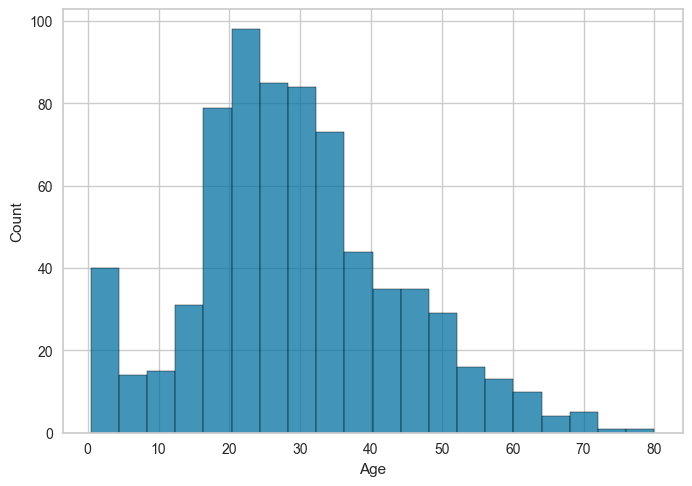

In [80]:
sns.histplot(training_set['Age'])
plt.show()

In [81]:
def age_category(age):
    if age < 18:
        return 'Ребенок'
    elif age < 65:
        return 'Взрослый'
    else:
        return 'Старик'

In [82]:
training_set['Age_Category'] = training_set['Age'].apply(age_category)
training_set.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Age_Category
0,0,3,22.0000,1,0,7.2500,True,False,True,Взрослый
1,1,1,38.0000,1,0,71.2833,False,False,False,Взрослый
2,1,3,26.0000,0,0,7.9250,False,False,True,Взрослый


In [83]:
ac = pd.get_dummies(training_set['Age_Category'], drop_first=True)
ac

,Ребенок,Старик
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
885,False,False
886,False,False
887,False,False
889,False,False


In [84]:
training_set = pd.concat([training_set, ac], axis=1)
training_set = training_set.drop(['Age_Category'], axis=1)
training_set.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Ребенок,Старик
0,0,3,22.0000,1,0,7.2500,True,False,True,False,False
1,1,1,38.0000,1,0,71.2833,False,False,False,False,False
2,1,3,26.0000,0,0,7.9250,False,False,True,False,False


In [85]:
X = training_set.drop(columns=['Survived']).to_numpy()
y = training_set[['Survived']].to_numpy().ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [86]:
ac, f1 = accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f'{ac=:.4f}\n{f1=:.4f}')

ac=0.8042
f1=0.7544
